In [14]:
import numpy as np
from skimage import exposure
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


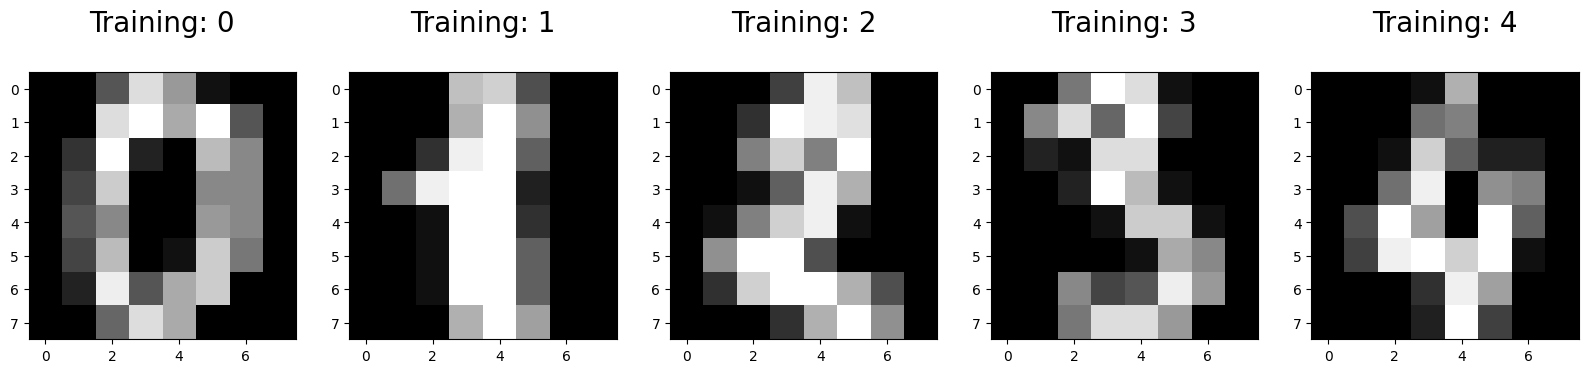

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Task

# Load the MNIST dataset. Use a library such as scikit-learn to access the dataset (from sklearn.datasets import load_digits).


#### For the sake of the task reassigning the Minst dataset from digits to mnist

In [4]:
# Load the MNIST dataset
mnist = digits
X, y = mnist.data, mnist.target

# reshape data to have samples in first dimension
X = X.reshape(-1, 8, 8)

X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

X_preprocessed = np.array(X_preprocessed)


# Split the data into train and test sets.
### Add a comment explaining the purpose of the train and test sets

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


#### We are splitting the dataset to training and test to be sure that the model will perform well in the real world

# Use the RandomForestClassifier built into scikit-learn to create a classification model.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predictions
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Show metrics
# Show metrics
print('Random Forest Classifier:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Random Forest Classifier:
Accuracy: 0.9805555555555555
Precision: 0.9808261833917556
Recall: 0.9805555555555555
F1 Score: 0.9805730782696227


In [8]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

# Pick one parameter to tune, and explain why you chose this parameter.

In [9]:
# Train the classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

# Select a value for the parameter to use during testing on the test data, and provide a rationale for your choice.

In [10]:
#bootstraping and finetuning maxdepth to predict if the accuracy increases as we know the bigger the depth the worse the accuracy drops and the model gets overfitted
best_rf_classifier = RandomForestClassifier(bootstrap=True, max_depth=10, random_state=42)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

#### I have chosen the max_depth value to fine tune since this diretly affect the accuracy of the model and how accurate the training is for prediction. Dased on the hyperparameter the best fit in terms of accuracy is 10 for max_depth parameter, among the ones in the options provided for comparisons

In [11]:
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_bst= accuracy_score(y_test, y_pred)
precision_bst = precision_score(y_test, y_pred, average='weighted')
recall_bst = recall_score(y_test, y_pred, average='weighted')
f1_bst = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix for your Random Forest model on the test set.

Text(0.5, 1.0, 'Test Confusion Matrix')

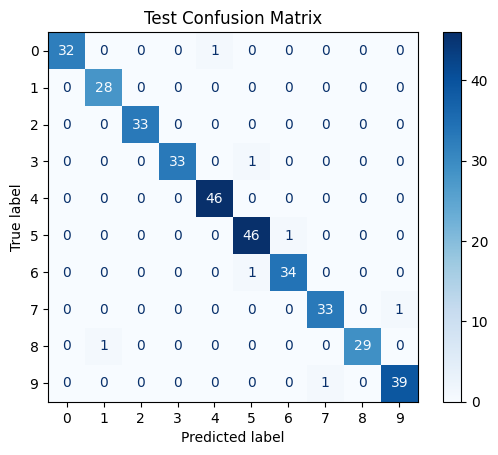

In [18]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

#### It looks like the classes, the model struggeled the most is at 0,1 and 8. It worked best at 4 and 5

# Report the accuracy, precision, recall, and f1-score.

In [17]:
# Show metrics
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy_bst))
print('Precision: {:.2f}'.format(precision_bst))
print('Recall: {:.2f}'.format(recall_bst))
print('F1 Score: {:.2f}'.format(f1_bst))


Random Forest Classifier:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
